In [1]:
!pip install nltk rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=7661c456e841683deb5d442713be47a65257863451a401fa8c9d9a14dbe52599
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [2]:
from google.colab import files
uploaded = files.upload()


Saving model_answer.json to model_answer.json


In [9]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import json
import numpy as np
# Load predictions
with open('model_answer.json') as f:
    preds = json.load(f)

smoothie = SmoothingFunction().method4

bleu1_scores = []
bleu2_scores = []
bleu4_scores = []

for pred in preds:
    # Use correct key names from your JSON
    nid = pred['clip_uid']
    gt_text = pred['gt_answer'].strip()

    # Extract just the model response
    raw_model_answer = pred['model_answer']
    if "ASSISTANT:" in raw_model_answer:
        pred_text = raw_model_answer.split("ASSISTANT:")[1].strip()
    else:
        pred_text = raw_model_answer.strip()

    if not gt_text or not pred_text:
        continue

    # Compute BLEU scores
    bleu1 = sentence_bleu([gt_text.split()], pred_text.split(), weights=(1, 0, 0, 0), smoothing_function=smoothie)
    bleu2 = sentence_bleu([gt_text.split()], pred_text.split(), weights=(0.5, 0.5, 0, 0), smoothing_function=smoothie)
    bleu4 = sentence_bleu([gt_text.split()], pred_text.split(), weights=(0.25, 0.25, 0.25, 0.25), smoothing_function=smoothie)

    bleu1_scores.append(bleu1)
    bleu2_scores.append(bleu2)
    bleu4_scores.append(bleu4)

# Print results
print(f"Avg BLEU-1: {sum(bleu1_scores)/len(bleu1_scores):.4f}")
print(f"Avg BLEU-2: {sum(bleu2_scores)/len(bleu2_scores):.4f}")
print(f"Avg BLEU-4: {sum(bleu4_scores)/len(bleu4_scores):.4f}")
print(f"Min BLEU-1: {np.min(bleu_scores):.4f}")
print(f"Max BLEU-1: {np.max(bleu_scores):.4f}")

print(f"Avg ROUGE-1: {np.mean(rouge1_scores):.4f}")
print(f"Avg ROUGE-L: {np.mean(rougeL_scores):.4f}")


Avg BLEU-1: 0.2327
Avg BLEU-2: 0.1694
Avg BLEU-4: 0.0961
Min BLEU-1: 0.0000
Max BLEU-1: 0.8889
Avg ROUGE-1: 0.4633
Avg ROUGE-L: 0.4149


In [6]:
# Set a threshold for 'failure'
threshold = 0.4

for pred, bleu in zip(preds, bleu1_scores):
    nid = pred['clip_uid']
    gt_text = pred['gt_answer'].strip()

    raw_model_answer = pred['model_answer']
    if "ASSISTANT:" in raw_model_answer:
        pred_text = raw_model_answer.split("ASSISTANT:")[1].strip()
    else:
        pred_text = raw_model_answer.strip()

    if bleu < threshold:
        print(f"\n--- Low BLEU example (BLEU={bleu:.2f}) ---")
        print(f"Clip UID: {nid}")
        print(f"GT: {gt_text}")
        print(f"Predicted: {pred_text}")



--- Low BLEU example (BLEU=0.24) ---
Clip UID: 8d3f5b12-ac2c-4315-80ed-bb827aa91bd4
GT: The cups on the table are turquoise blue with a copper bottom and inner turquoise color.
Predicted: The cups on the table are green.

--- Low BLEU example (BLEU=0.36) ---
Clip UID: c664f078-9b34-4a58-b949-180ac4bc0980
GT: You used a utility knife (box cutter) to sharpen the pencils.
Predicted: You sharpened the pencils with a green utility knife.

--- Low BLEU example (BLEU=0.37) ---
Clip UID: c7873f07-7b9c-4794-9a56-fdebeeceee68
GT: a woman wearing dark clothes and white sneakers, who is near the white car in the parking lot.
Predicted: You spoke to a woman wearing a black dress in the parking lot.

--- Low BLEU example (BLEU=0.00) ---
Clip UID: 8d3f5b12-ac2c-4315-80ed-bb827aa91bd4
GT: There are four laptops in the room. Two laptops on the white table (one being used by a person with red hair, and the other is also visible) and one on the metal shelf used by a man in a navy shirt. In addition, the

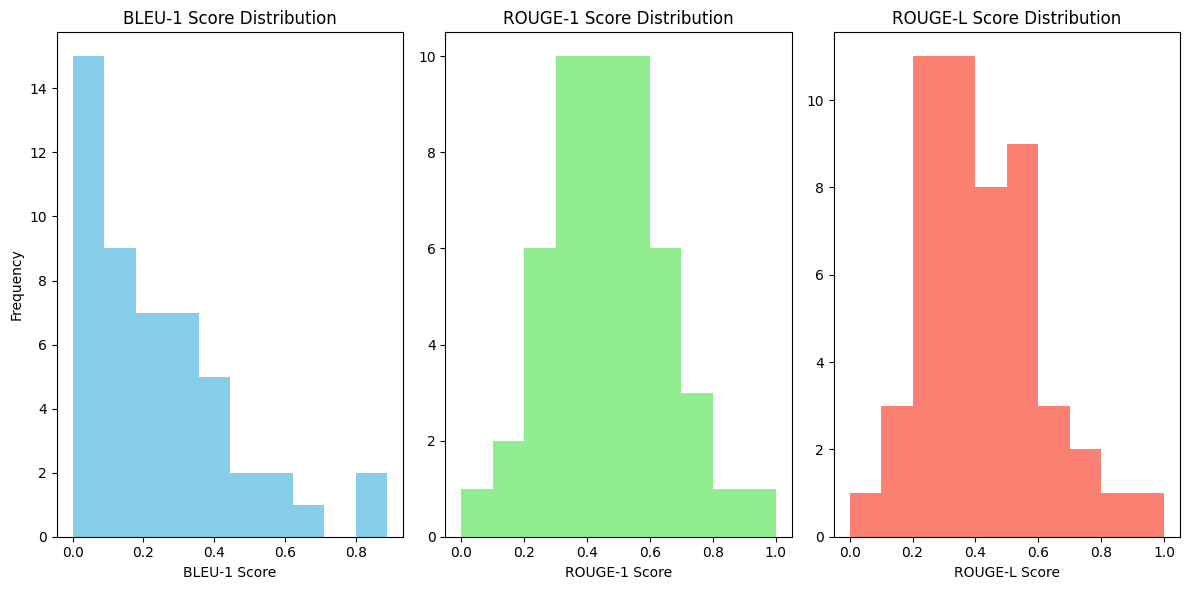

In [7]:
import matplotlib.pyplot as plt

# Assuming bleu_scores, rouge1_scores, rougeL_scores are lists of floats

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(bleu_scores, bins=10, color='skyblue')
plt.title('BLEU-1 Score Distribution')
plt.xlabel('BLEU-1 Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(rouge1_scores, bins=10, color='lightgreen')
plt.title('ROUGE-1 Score Distribution')
plt.xlabel('ROUGE-1 Score')

plt.subplot(1, 3, 3)
plt.hist(rougeL_scores, bins=10, color='salmon')
plt.title('ROUGE-L Score Distribution')
plt.xlabel('ROUGE-L Score')

plt.tight_layout()
plt.show()